<a href="https://www.kaggle.com/code/murtaza0125/text-classification-sms-spam-or-ham?scriptVersionId=123277290" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam1csv/spam.csv


In [2]:
df = pd.read_csv('/kaggle/input/spam1csv/spam.csv', encoding= 'ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df = df[['v1', 'v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='v1', ylabel='count'>

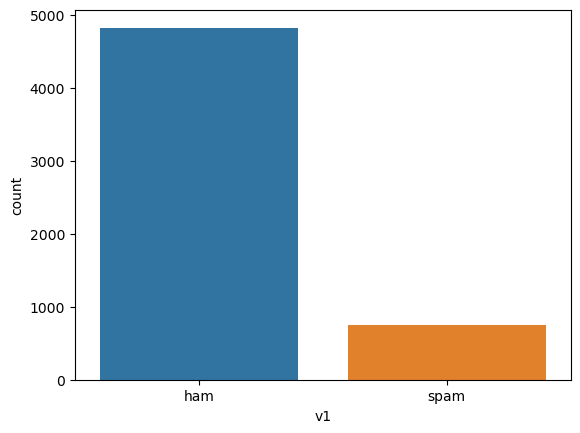

In [8]:
sns.countplot(x=df['v1'])

In [9]:
import tensorflow as tf

In [10]:
tf.__version__

'2.11.0'

In [11]:
import random
random.seed(0)

In [12]:
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from tensorflow.keras.models import Model

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
from tensorflow.keras.preprocessing import sequence

In [18]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Embedding, Input

In [19]:
X = df['v2']
y = df['v1']

In [20]:
X.shape, y.shape

((5572,), (5572,))

In [21]:
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [22]:
y.head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
y = le.fit_transform(y)

In [26]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #70:30

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900,), (1672,), (3900,), (1672,))

# Text Preprocessing with Tensor Flow / Keras

In [29]:
tok = Tokenizer(num_words=1000)

In [30]:
tok.fit_on_texts(X_train)

In [31]:
tok.get_config()

{'num_words': 1000,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 3900,
 'word_counts': '{"baaaaaaaabe": 1, "wake": 16, "up": 215, "i": 1641, "miss": 54, "you": 1526, "crave": 8, "need": 124, "tired": 7, "haven\'t": 16, "slept": 6, "well": 78, "the": 943, "past": 3, "few": 34, "nights": 5, "3": 55, "have": 415, "received": 3, "your": 471, "mobile": 105, "content": 13, "enjoy": 29, "double": 17, "mins": 32, "1000": 3, "txts": 9, "on": 361, "orange": 20, "tariffs": 5, "latest": 28, "motorola": 10, "sonyericsson": 4, "nokia": 42, "with": 280, "bluetooth": 6, "free": 190, "call": 413, "mobileupd8": 10, "08000839402": 10, "or": 309, "call2optout": 8, "hf8": 1, "hey": 71, "very": 60, "inconvenient": 1, "for": 475, "sis": 13, "a": 1016, "not": 276, "huh": 13, "but": 313, "i\'ll": 125, "b": 50, "going": 123, "2": 352, "sch": 12, "mon": 4, "my": 514, "take": 100, "smth": 13, "ever": 27, "had": 72, 

In [32]:
seq = tok.texts_to_sequences(X_train)

In [33]:
seq

[[536, 43, 1, 171, 3, 1, 916, 3, 1, 76, 3],
 [1, 537, 122, 5, 275],
 [169, 3, 15, 13, 92, 634, 314],
 [515, 293, 837, 19, 435, 319, 776, 224, 30, 51, 16, 777, 19, 778, 25, 917],
 [139, 159, 12, 13, 635, 4, 32, 636],
 [24, 75, 187, 77, 20, 682, 19, 11, 635, 76, 20, 95, 637],
 [15, 3, 332, 135, 73, 179],
 [26, 31, 136, 94, 16],
 [139, 163, 11, 276, 135, 2, 79, 43, 12, 4, 725],
 [22,
  208,
  243,
  918,
  2,
  35,
  267,
  31,
  188,
  24,
  63,
  159,
  275,
  33,
  267,
  2,
  3,
  418,
  13,
  180,
  196,
  418,
  164,
  919],
 [85, 26, 32, 51],
 [489,
  165,
  13,
  419,
  920,
  56,
  4,
  16,
  48,
  462,
  562,
  16,
  2,
  538,
  3,
  61,
  180,
  172,
  132,
  150,
  209],
 [44],
 [89,
  89,
  26,
  77,
  2,
  40,
  125,
  2,
  80,
  11,
  838,
  1,
  158,
  5,
  72,
  683,
  22,
  63,
  1,
  68,
  257,
  1,
  33,
  126,
  14,
  19,
  133],
 [180,
  393,
  123,
  38,
  597,
  17,
  598,
  90,
  70,
  684,
  2,
  21,
  726,
  779,
  92,
  172,
  277,
  726,
  638,
  921,
  278],


In [34]:
mat_seq = sequence.pad_sequences(seq, maxlen=150)

In [35]:
#mat = tok.sequences_to_matrix(seq, mode='count')

In [36]:
#mat.shape

from tensorflow.keras.preprocessing import sequence

seq_mat = sequence.pad_sequences()

In [37]:
def lstm_1():
    inputs = Input(name='inputs', shape=[150])
    layer = Embedding(1000, 50, input_length=150)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [38]:
model = lstm_1()

In [39]:
from tensorflow.keras.optimizers import RMSprop

In [40]:
model.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [41]:
model.fit(mat_seq,y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
25/25 [==============================] - 8s 205ms/step - loss: 0.4923 - accuracy: 0.8442 - val_loss: 0.3066 - val_accuracy: 0.8795
Epoch 2/10
25/25 [==============================] - 5s 182ms/step - loss: 0.2121 - accuracy: 0.9122 - val_loss: 0.0940 - val_accuracy: 0.9872
Epoch 3/10
25/25 [==============================] - 5s 180ms/step - loss: 0.0659 - accuracy: 0.9843 - val_loss: 0.0466 - val_accuracy: 0.9808
Epoch 4/10
25/25 [==============================] - 4s 175ms/step - loss: 0.0328 - accuracy: 0.9920 - val_loss: 0.0379 - val_accuracy: 0.9872
Epoch 5/10
25/25 [==============================] - 4s 174ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0466 - val_accuracy: 0.9821
Epoch 6/10
25/25 [==============================] - 5s 187ms/step - loss: 0.0136 - accuracy: 0.9965 - val_loss: 0.0436 - val_accuracy: 0.9885
Epoch 7/10
25/25 [==============================] - 4s 176ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 